In [1]:
# %load imports.py
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
diamonds=sns.load_dataset('diamonds')
print(diamonds.shape)
diamonds.head()

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
import random
def sys_sample(data, step):
    index=np.arange((random.randint(0,10)), len(data), step=step)
    sample=data.iloc[index]
    return sample
sample= sys_sample(diamonds,100)

# scatterplots

## scatterplot with Matplotlib

Text(0,0.5,'price')

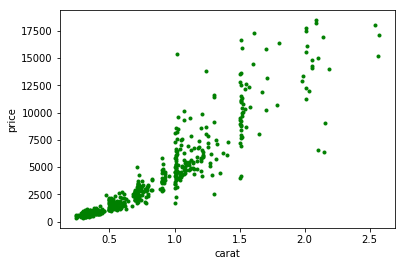

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 4]
# c species the colour of the point, b-blue, g-green, r-red, c-cyan, m-magenta, y-yellow, k-black, w-white
plt.scatter(sample['carat'], sample['price'], marker = '.', c='g')
plt.xlabel('carat')
plt.ylabel('price')

[Text(0,0.5,'price'), Text(0.5,0,'carat'), Text(0.5,1,'Diamonds')]

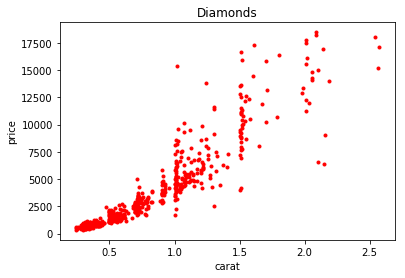

In [5]:
# second method
fig, ax = plt.subplots()
ax.scatter(sample['carat'], sample['price'], marker = '.', c='r')
ax.set(title = "Diamonds",
       xlabel = "carat",
       ylabel = "price")
# you could also plot a second series on the graph using this method, 
# eg ax.scatter(sample['x2'], sample['price'], marker = '.', c='b')
# plt.legend(loc='upper left')

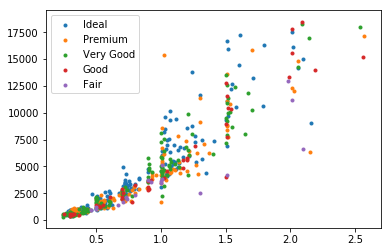

In [6]:
# grouping with matplotlib scatter plots
fig, ax = plt.subplots()
cut=sample.groupby('cut')
for i, j in cut:
    ax.scatter(j['carat'], j['price'], marker = '.', label=i)
plt.legend(loc='upper left')

switching between the plt and ax methods in matplotlib...

plt.xlabel() → ax.set_xlabel()


plt.ylabel() → ax.set_ylabel()


plt.xlim() → ax.set_xlim()


plt.ylim() → ax.set_ylim()


plt.title() → ax.set_title()

## scatterplot with Seaborn

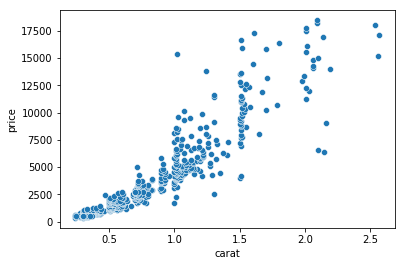

In [7]:
sns.scatterplot(x='carat', y='price', data=sample)

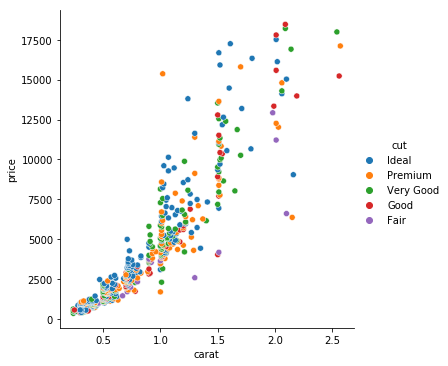

In [8]:
# scatter graphs can also be plotted with relplot() which uses scatter as the default plot
sns.relplot(x='carat', y='price', data=sample, hue='cut')

# Subplots

## subplots in matplotlib
using add_subplot()

Text(-0.1,0,'Carat')

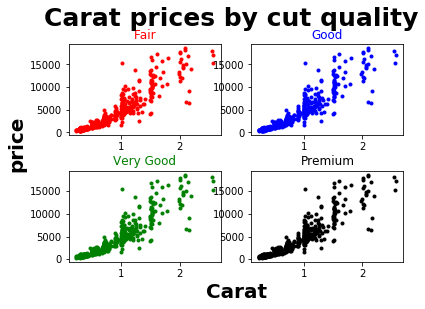

In [9]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [16,16]
plt.subplots_adjust(wspace=0.2, hspace=0.4)
fig.suptitle('Carat prices by cut quality', fontsize=25,fontweight="bold", color="black", 
             position=(0.5,1.01))

ax1 = fig.add_subplot(221)
ax1.scatter(sample['carat'], sample['price'], data=sample[sample['cut']=='Fair'], marker = '.', c='r')
ax1.set_title('Fair', color="r")
ax1.set_ylabel("price", fontweight="bold", position=(0,-0.1), fontsize=20)

ax2 = fig.add_subplot(222)
ax2.scatter(sample['carat'], sample['price'], data=sample[sample['cut']=='Good'], marker = '.', c='b')
ax2.set_title('Good', color="b")

ax3 = fig.add_subplot(223)
ax3.scatter(sample['carat'], sample['price'], data=sample[sample['cut']=='Very Good'], marker = '.', c='g')
ax3.set_title('Very Good', color="g")

ax4 = fig.add_subplot(224)
ax4.scatter(sample['carat'], sample['price'], data=sample[sample['cut']=='Premium'], marker = '.', c='k')
ax4.set_title('Premium', color="k")
ax4.set_xlabel("Carat", fontweight="bold", position=(-0.1,0), fontsize=20)

seeing these graphs have the same x axis, we can use a shared axis using sharex

Text(0.5,0,'Carat')

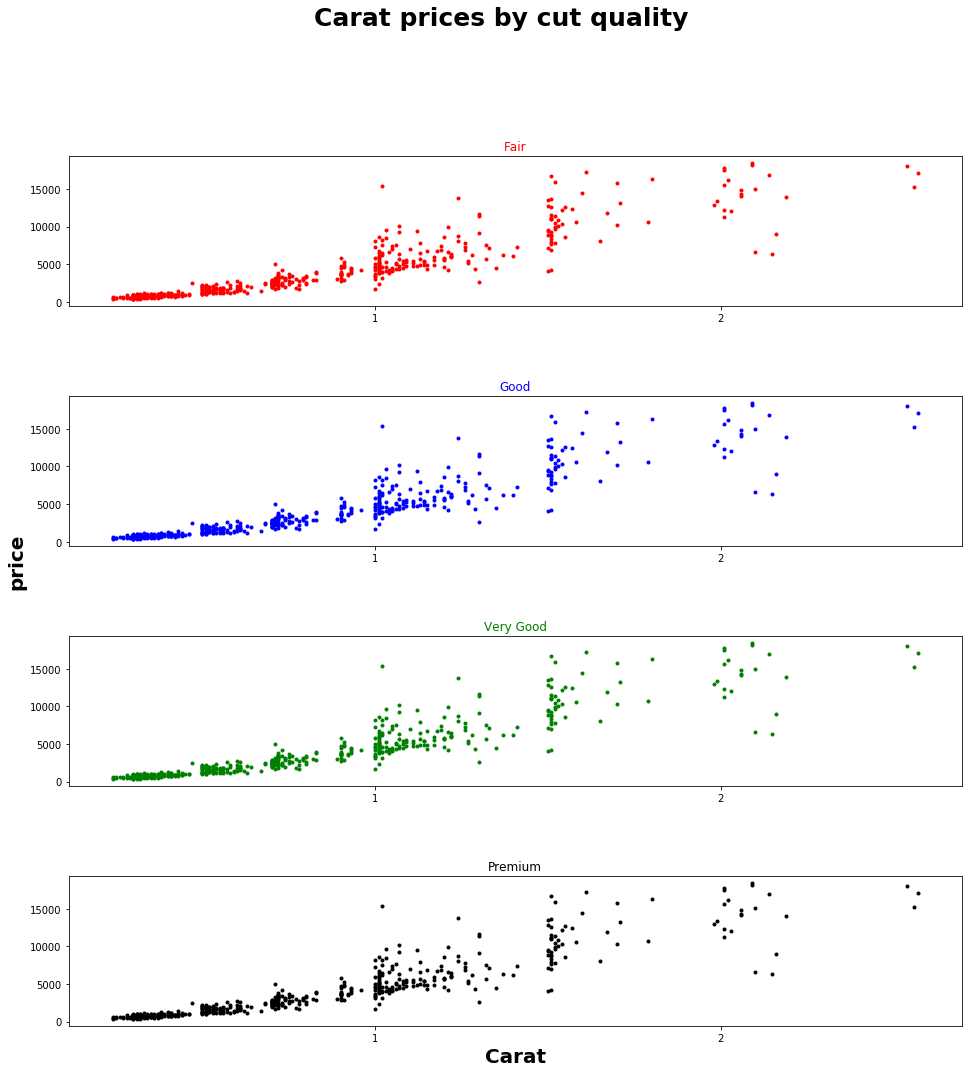

In [10]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [20,20]
plt.subplots_adjust( hspace=.6)
fig.suptitle('Carat prices by cut quality', fontsize=25,fontweight="bold", color="black", 
             position=(0.5,1.01))

ax2 = fig.add_subplot(412, sharex=ax2)
ax2.scatter(sample['carat'], sample['price'], data=sample[sample['cut']=='Good'], marker = '.', c='b')
ax2.set_title('Good', color="b")
ax2.set_ylabel("price", fontweight="bold", position=(0,-0.1), fontsize=20)

ax1 = fig.add_subplot(411, sharex=ax2)
ax1.scatter(sample['carat'], sample['price'], data=sample[sample['cut']=='Fair'], marker = '.', c='r')
ax1.set_title('Fair', color="r")


ax3 = fig.add_subplot(413, sharex=ax2)
ax3.scatter(sample['carat'], sample['price'], data=sample[sample['cut']=='Very Good'], marker = '.', c='g')
ax3.set_title('Very Good', color="g")

ax4 = fig.add_subplot(414, sharex=ax2)
ax4.scatter(sample['carat'], sample['price'], data=sample[sample['cut']=='Premium'], marker = '.', c='k')
ax4.set_title('Premium', color="k")
ax4.set_xlabel("Carat", fontweight="bold", position=(0.5,0), fontsize=20)

## subplots with seaborn

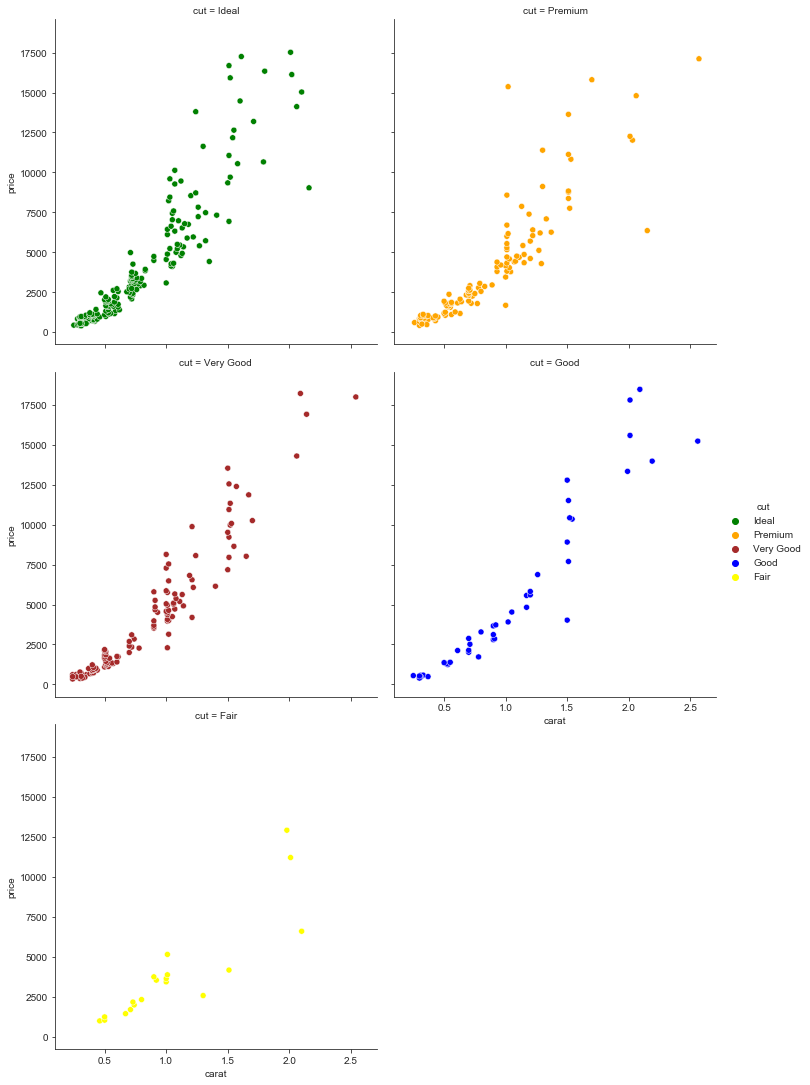

In [11]:
# using 'col_wrap' to view the graphs on a seperate line, 'col' to specify how the graphs get seperated
sns.set_style('ticks')
plot=sns.relplot(x='carat', y='price', data=sample, hue='cut', 
                 palette=['green','orange','brown','blue','yellow'], col='cut',
                height=5, aspect=1, col_wrap=2)

# Line graphs

## line graphs with matplotlib

In [12]:
data=pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv')
data.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65


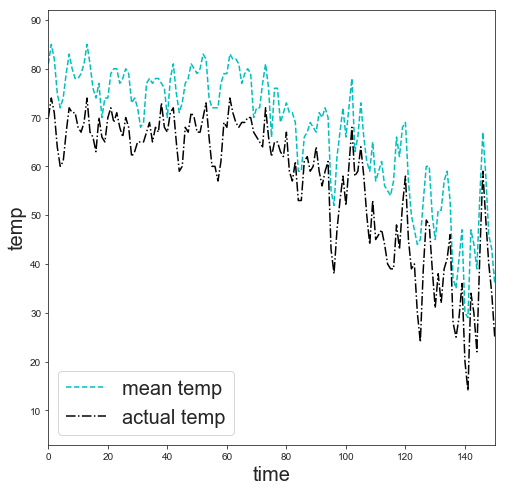

In [13]:
plt.rcParams['figure.figsize'] = [8,8]
plt.plot(data.index, data['actual_mean_temp'], '--c', label='mean temp')
plt.plot(data.index, data['actual_min_temp'], '-.k', label='actual temp')
plt.xlim(0, 150)
plt.xlabel("time", fontsize=20)
plt.ylabel("temp", fontsize=20)
plt.legend(fontsize=20)

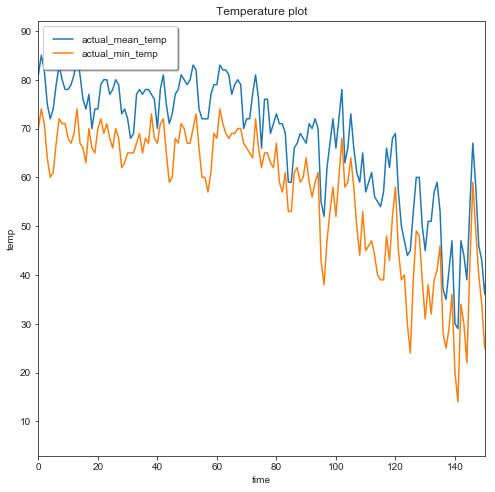

In [14]:
# setting all these at once...
plt.rcParams['figure.figsize'] = [8,8]
ax = plt.axes()
ax.plot(data.index, data['actual_mean_temp'])
plt.plot(data.index, data['actual_min_temp'])
ax.set(xlim=(0, 150),
       xlabel='time', ylabel='temp',
       title='Temperature plot', )
ax.legend(loc='upper left', framealpha=1, shadow=True, borderpad=1)

## line graphs in seaborn

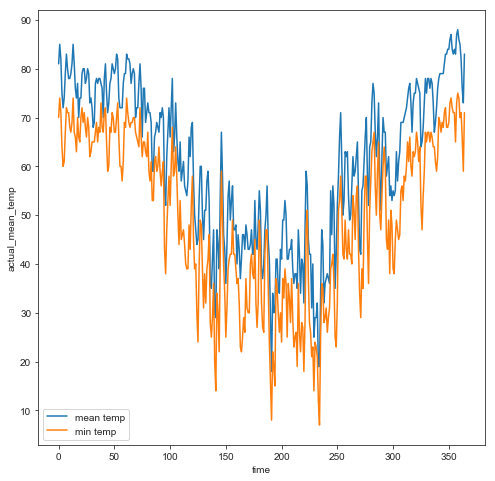

In [15]:
sns.lineplot(x=data.index, y='actual_mean_temp', data=data, label='mean temp')
sns.lineplot(x=data.index, y='actual_min_temp', data=data, label='min temp')
plt.xlabel("time", fontsize = 10)
plt.legend(fontsize=10)

# achieve the same result with relplot, specifing the line kind 
# sns.relplot(x=data.index, y='actual_mean_temp', data=data, kind='line')

FacetGrid in Seaborn- use of 2 categories 

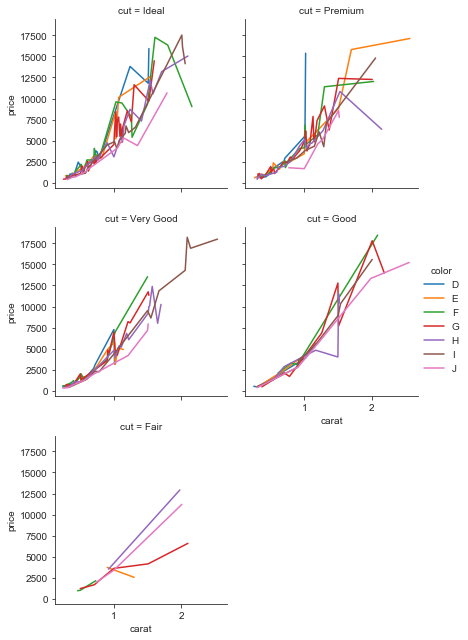

In [16]:

g = sns.FacetGrid(sample, col='cut', hue='color', col_wrap=2)
g = g.map(sns.lineplot, 'carat', 'price', ci=None,).add_legend()
# use this with sns.scatter also

# Bar chart

## bar chart with Matplotlib

In [17]:
# finding the total price for al diamonds in each cut
premium=sample.loc[sample['cut']=='Premium', 'price'].sum()
good=sample.loc[sample['cut']=='Good', 'price'].sum()
verygood=sample.loc[sample['cut']=='Very Good', 'price'].sum()

cuts=['premium', 'good', 'very good']
values=[premium, good, verygood ]

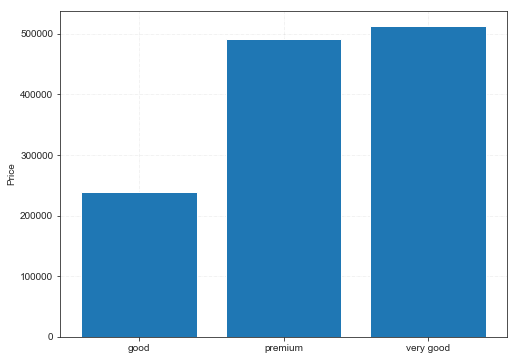

In [18]:
fig, ax = plt.subplots(figsize =(8, 6))
ax.bar(cuts, values)
ax.set_ylabel('Price')
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)


In [19]:
barWidth = 0.25

premium_second_hand=(sample.loc[sample['cut']=='Premium', 'price'].sum())*0.72-premium*0.009
good_second_hand=(sample.loc[sample['cut']=='Good', 'price'].sum())*0.72-good*0.009
verygood_second_hand=(sample.loc[sample['cut']=='Very Good', 'price'].sum())*0.72-verygood*0.009

premium_total=[premium, premium_second_hand]
good_total=[good, good_second_hand]
verygood_total=[verygood, verygood_second_hand]


([<matplotlib.axis.XTick at 0x17a85c58710>,
 <a list of 2 Text xticklabel objects>)

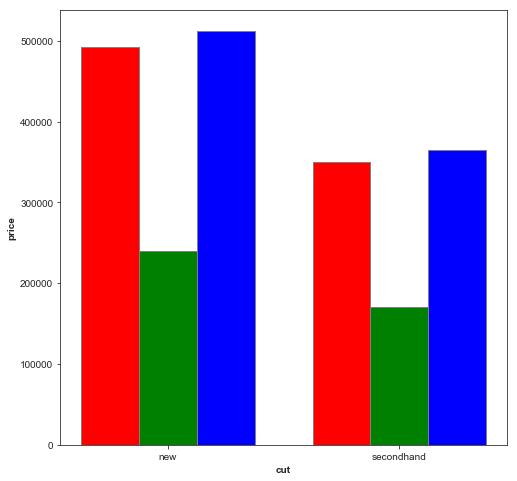

In [20]:
plt.bar(np.arange(2), premium_total, color ='r', width = barWidth, 
        edgecolor ='grey', label ='premium') 
plt.bar(np.arange(2)+barWidth, good_total, color ='g', width = barWidth, 
        edgecolor ='grey', label ='good') 
plt.bar(np.arange(2)+2*barWidth, verygood_total, color ='b', width = barWidth, 
        edgecolor ='grey', label ='verygood')

plt.xlabel('cut', fontweight ='bold') 
plt.ylabel('price', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(2)], 
           ['new', 'secondhand']) 

## bar chart in seaborn

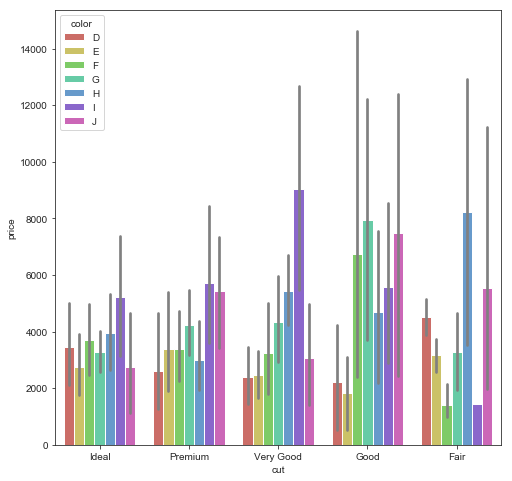

In [21]:
sns.barplot(x='cut', y='price', hue='color', data=sample, palette = 'hls',
           errcolor='grey')

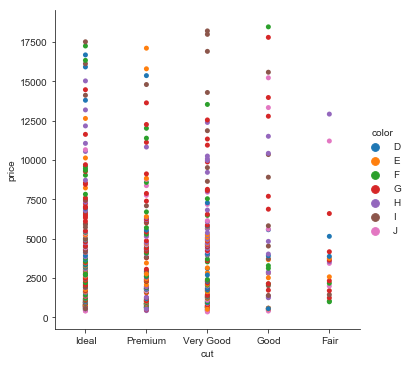

In [25]:
sns.catplot(x="cut", y="price", data=sample, jitter=False, hue='color')

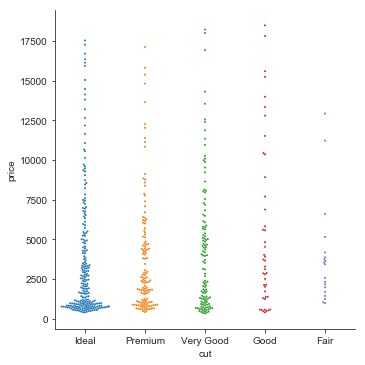